# **Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# **Reading Dataset**

In [2]:
df= pd.read_csv('diabetes_prediction_dataset.csv')
print(df.diabetes.value_counts())
df.head()

diabetes
0    91500
1     8500
Name: count, dtype: int64


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


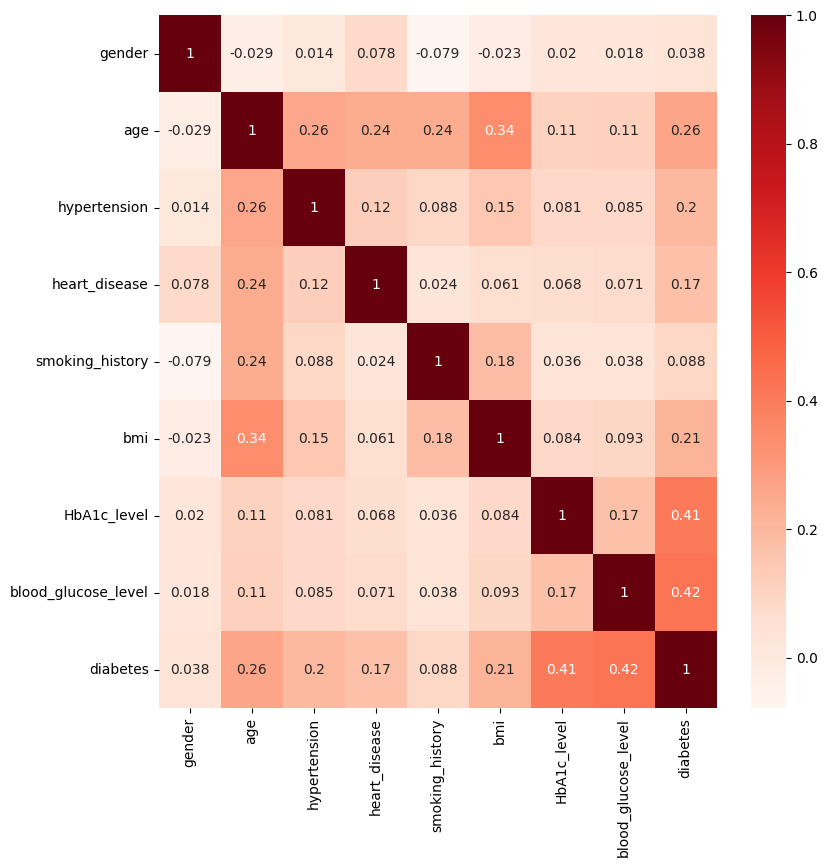

In [8]:
# heatmap
plt.figure(figsize=(9,9))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

# **Data Preprocessing**

In [9]:
# remove duplicate values
df = df.drop_duplicates()
print("Removed Duplicate: ",df.duplicated().sum())

# check for null values
df.isnull().sum()

# Encoding the data
le = LabelEncoder()
df.gender = le.fit_transform(df.gender)
df.smoking_history = le.fit_transform(df.smoking_history)
df.head()

Removed Duplicate:  0


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


# **Standardizing the Features**

In [10]:
#Splitting independent and dependent values
X = df.iloc[:, :-1]
Y = df.diabetes

# Standardizing the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=1)
X_resampled, Y_resampled = smote.fit_resample(X_scaled, Y)

# **Building Model using XGBClassifier**

In [11]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.25, random_state=1, stratify=Y_resampled)

model_xgb = XGBClassifier()
model_xgb.fit(X_train, Y_train)

# Making predictions
Y_pred_xgb = model_xgb.predict(X_test)



# **Building Model using Random Forest**

In [12]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)

# Making predictions
Y_pred_rf = model_rf.predict(X_test)

# **Building model using KNN**

In [13]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)

# Making predictions
Y_pred_knn = model_knn.predict(X_test)

# **Combining three models**

In [14]:
model_all = VotingClassifier(estimators=[
    ('knn', model_xgb),
    ('rf', model_rf),
    ('xgb', model_knn)
], voting='hard')

# Train the voting classifier
model_all.fit(X_train, Y_train)

# Evaluate accuracy on the test set
Y_pred_all = model_all.predict(X_test)
accuracy_all = accuracy_score(Y_test, Y_pred_all)
print(f'Voting Classifier Accuracy: {accuracy_all*100:.2f}')
print(f'Classification Report of model:\n{classification_report(Y_test, Y_pred_all)}')

Voting Classifier Accuracy: 97.90
Classification Report of model:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     21916
           1       0.98      0.98      0.98     21916

    accuracy                           0.98     43832
   macro avg       0.98      0.98      0.98     43832
weighted avg       0.98      0.98      0.98     43832



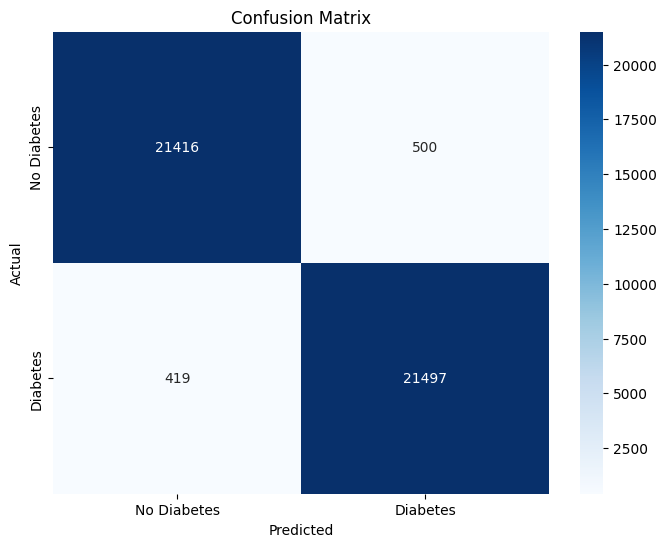

In [15]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_all)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Save Model**

In [21]:
import pickle

with open('Diabetes_model_knn.pkl', 'wb') as f:
    pickle.dump((model_knn,scaler), f)

with open('Diabetes_model_randomforest.pkl', 'wb') as f:
    pickle.dump((model_rf,scaler), f)

with open('Diabetes_model_xgbclassifier.pkl', 'wb') as f:
    pickle.dump((model_xgb,scaler), f)

with open('Diabetes_model_all.pkl', 'wb') as f:
    pickle.dump((model_all,scaler), f)


# **End of Program**